## Ensemble Learning: Bagging and Boosting

Pengyu Hong

### 0. Import libraries and load demo datasets

In [10]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import tree

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

trainData = pd.read_csv( 'training_data.csv' )
testData = pd.read_csv( 'test_data.csv' )

In [2]:
# Prepare training data
X_train = trainData.drop( ['Label'], axis = 1 )
y_train = trainData['Label']
X_test = testData.drop( ['Label'], axis = 1 )
y_test = testData['Label']

### 1. Single Tree

In [3]:
aTreeClassifier = tree.DecisionTreeClassifier()
aTreeClassifier = aTreeClassifier.fit(X_train, y_train)

y_pred = aTreeClassifier.predict( X_train )
print( 'Single tree: training accuracy =', sum( y_pred == y_train ) / len( y_train ) )

y_pred = aTreeClassifier.predict( X_test )
print( 'Single tree: test accuracy =', sum( y_pred == y_test ) / len( y_test ) )

Single tree: training accuracy = 1.0
Single tree: test accuracy = 0.771


#### Exercise: Train a better tree classifier.

In [42]:
# Your codes here
clf = tree.DecisionTreeClassifier()

param = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2,4,6,8,10,12,14,16,18,20],
    "splitter": ["best", "random"]
    }
grid = GridSearchCV(clf, param_grid=param, cv=8)

aTreeClassifier = grid.fit(X_train, y_train)

y_pred = grid.predict(X_train)
print( 'Single tree: training accuracy =', sum( y_pred == y_train ) / len( y_train ) )

y_pred = grid.predict(X_test)
print( 'Single tree: training accuracy =', sum( y_pred == y_train ) / len( y_train ) )

Single tree: training accuracy = 0.861
Single tree: training accuracy = 0.816


### 2. Random Forest

In [32]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)
print( 'Random forest: training accuracy =', sum( y_pred == y_train ) / len( y_train ) )

y_pred = rf.predict(X_test)
print( 'Random forest: test accuracy =', sum( y_pred == y_test ) / len( y_test ) )

Random forest: training accuracy = 0.992
Random forest: test accuracy = 0.83


In [29]:
grid.best_params_

{'max_depth': 20, 'n_estimators': 100}

#### Exercise: Train a better random forest classifier

In [38]:
# Your codes here
rf = RandomForestClassifier(n_estimators=100,max_depth=20)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)
print( 'Random forest: training accuracy =', sum( y_pred == y_train ) / len( y_train ) )

y_pred = rf.predict(X_test)
print( 'Random forest: test accuracy =', sum( y_pred == y_test ) / len( y_test ) )

Random forest: training accuracy = 1.0
Random forest: test accuracy = 0.854


#### 2.1 Feature importance

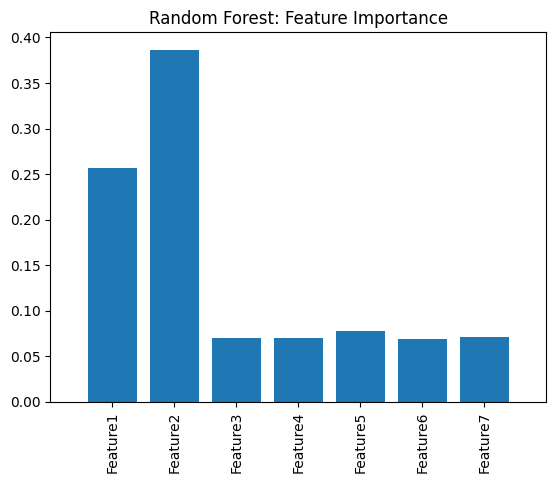

In [39]:
importances = rf.feature_importances_

plt.figure()
plt.title("Random Forest: Feature Importance")
plt.bar(range(X_train.shape[1]), importances, align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### 3. Boosting - AdaBoost

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
abc = AdaBoostClassifier( tree.DecisionTreeClassifier(max_depth=6), n_estimators = 10 )
abc.fit(X_train, y_train)

y_pred = abc.predict( X_train )
print( 'AdaBoost tree: training accuracy =', sum( y_pred == y_train ) / len( y_train ) )

y_pred = abc.predict(X_test)
print( 'AdaBoost tree: test Accuracy =', sum( y_pred == y_test ) / len( y_test ) )

AdaBoost tree: training accuracy = 1.0
AdaBoost tree: test Accuracy = 0.785


#### Exercise: Train a better AdaBoost classifier

In [62]:
# Your codes here
abc = AdaBoostClassifier( tree.DecisionTreeClassifier(criterion= 'entropy', max_depth=4, splitter= 'best'), n_estimators = 1000, learning_rate=1.6, 
                         algorithm='SAMME' )
abc.fit(X_train, y_train)

y_pred = abc.predict( X_train )
print( 'AdaBoost tree: training accuracy =', sum( y_pred == y_train ) / len( y_train ) )

y_pred = abc.predict(X_test)
print( 'AdaBoost tree: test Accuracy =', sum( y_pred == y_test ) / len( y_test ) )

AdaBoost tree: training accuracy = 1.0
AdaBoost tree: test Accuracy = 0.852


/Users/ericwang/opt/miniconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:666: RuntimeWarning: invalid value encountered in divide
  return self.tree_.compute_feature_importances()


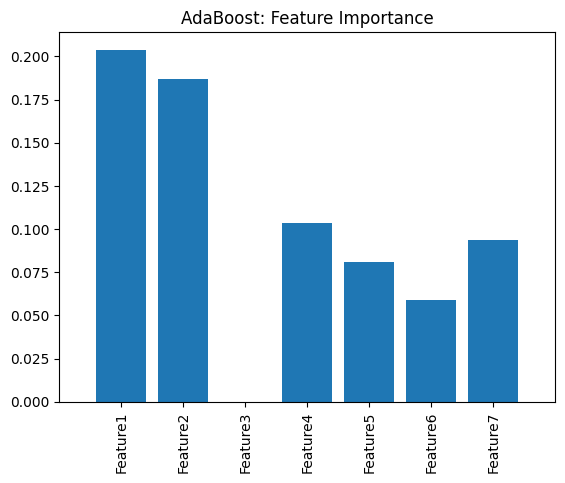

In [65]:
importances = abc.feature_importances_

plt.figure()
plt.title("AdaBoost: Feature Importance")
plt.bar(range(X_train.shape[1]), importances, align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()